# Long Short Term Memory Network(LSTM) 

RNNs perform poorly on long sequences. Why? 

 <!-- - RNNs tend to forget the output at of the first RNN unit cell, due to the way they are designed -->
   <!-- - Variant of RNN, to address the vanishing gradient problem which we saw in the past tutorial -->


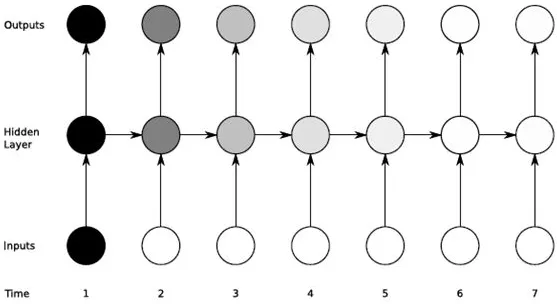

[source](https://towardsdatascience.com/tutorial-on-lstm-a-computational-perspective-f3417442c2cd)

## Architecture

DISCLAIMER: There are multiple vairants of LSTMs, here we will be only concerned with the LSTM version proposed by Hochreiter & Schmidhuber (1997). For other variants the mathematical equations might be different but the overall paradigm will stay the same .i.e. Forget layer, input layer, output layer

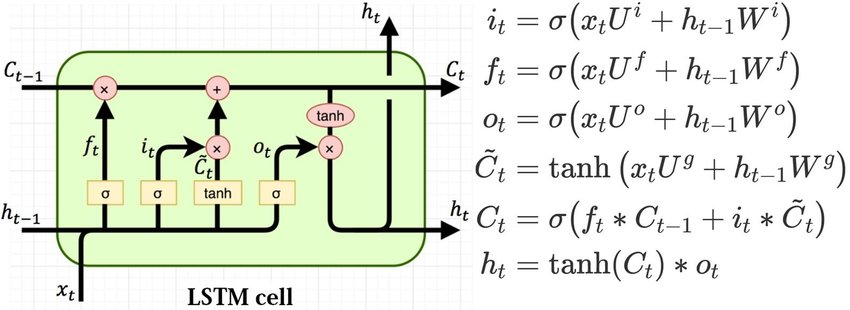

### Forget layer

  - Forgets information from the hidden state

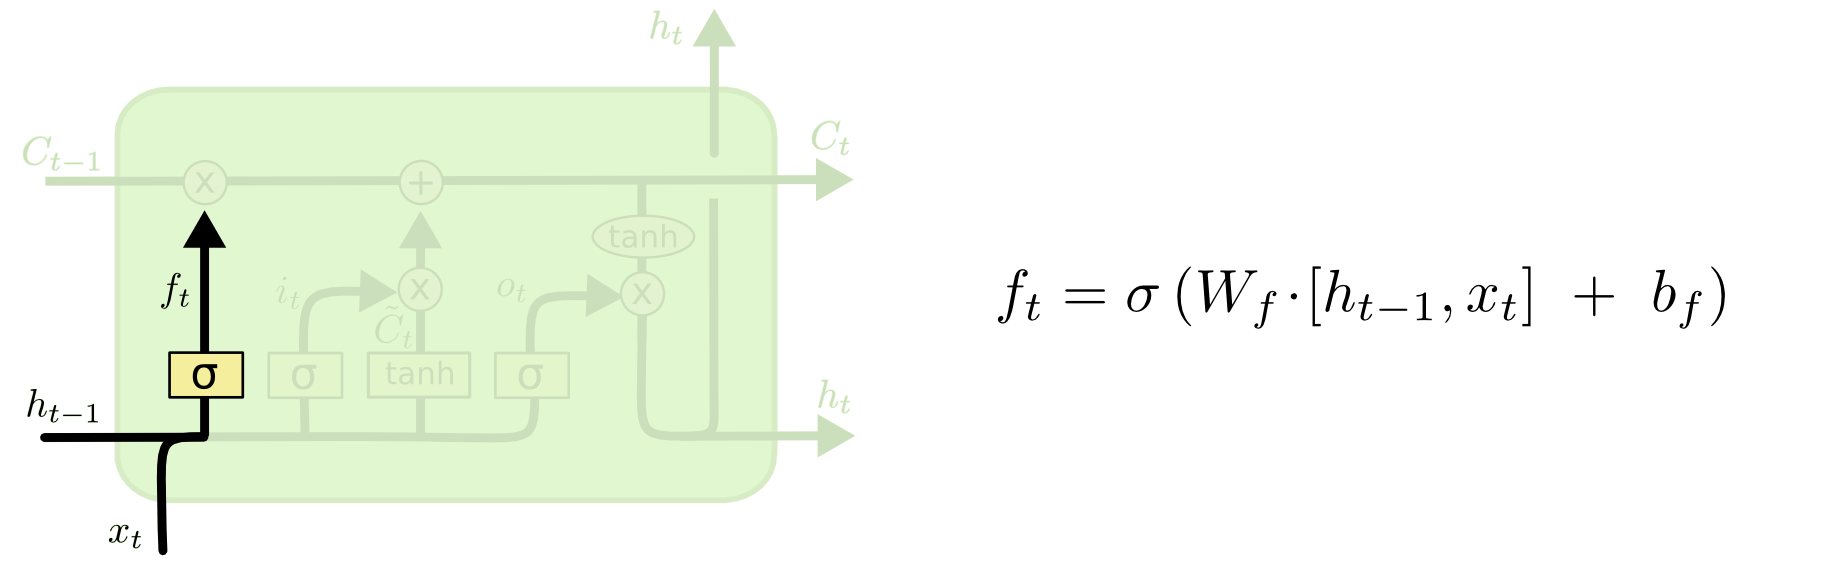

### Input gate layer

  - Add new information to the cell state from the current input

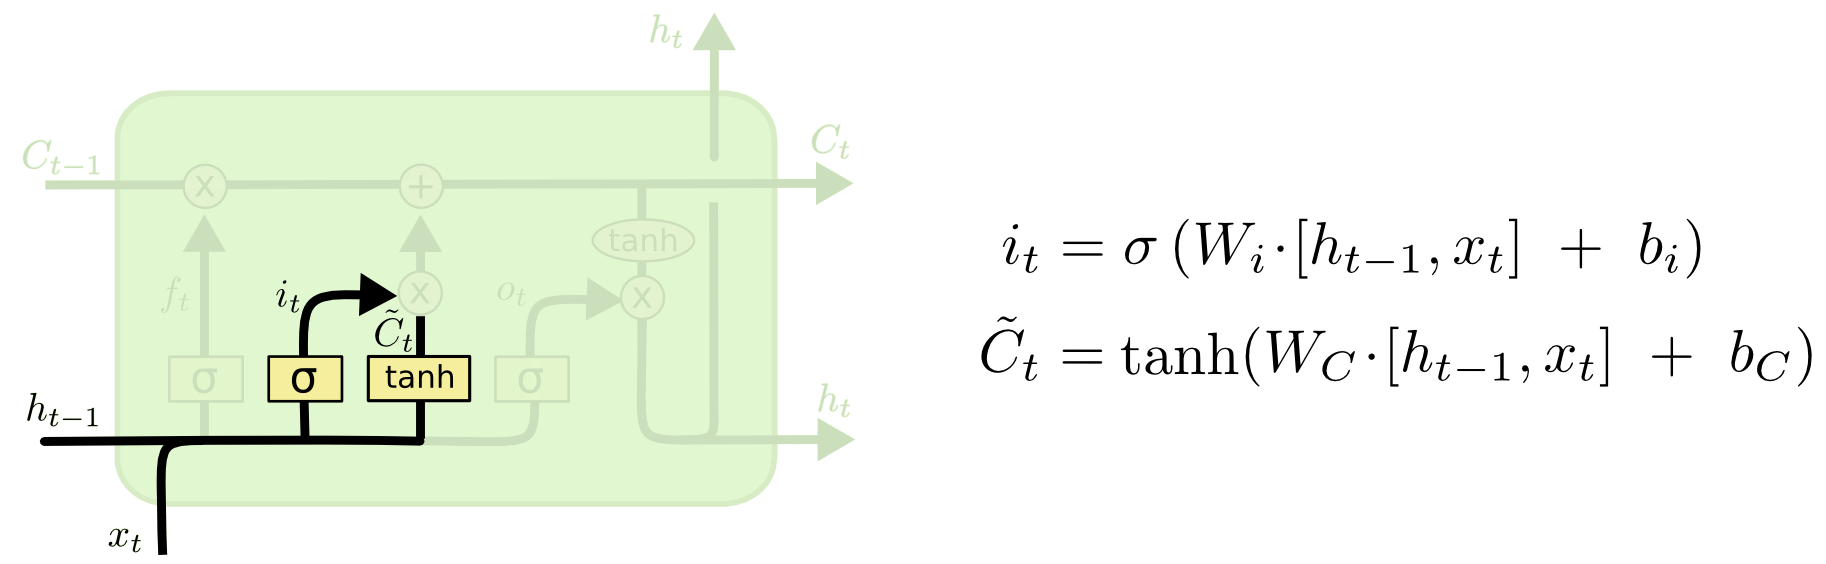

### Update cell state

- Forgets certain information and adds new information

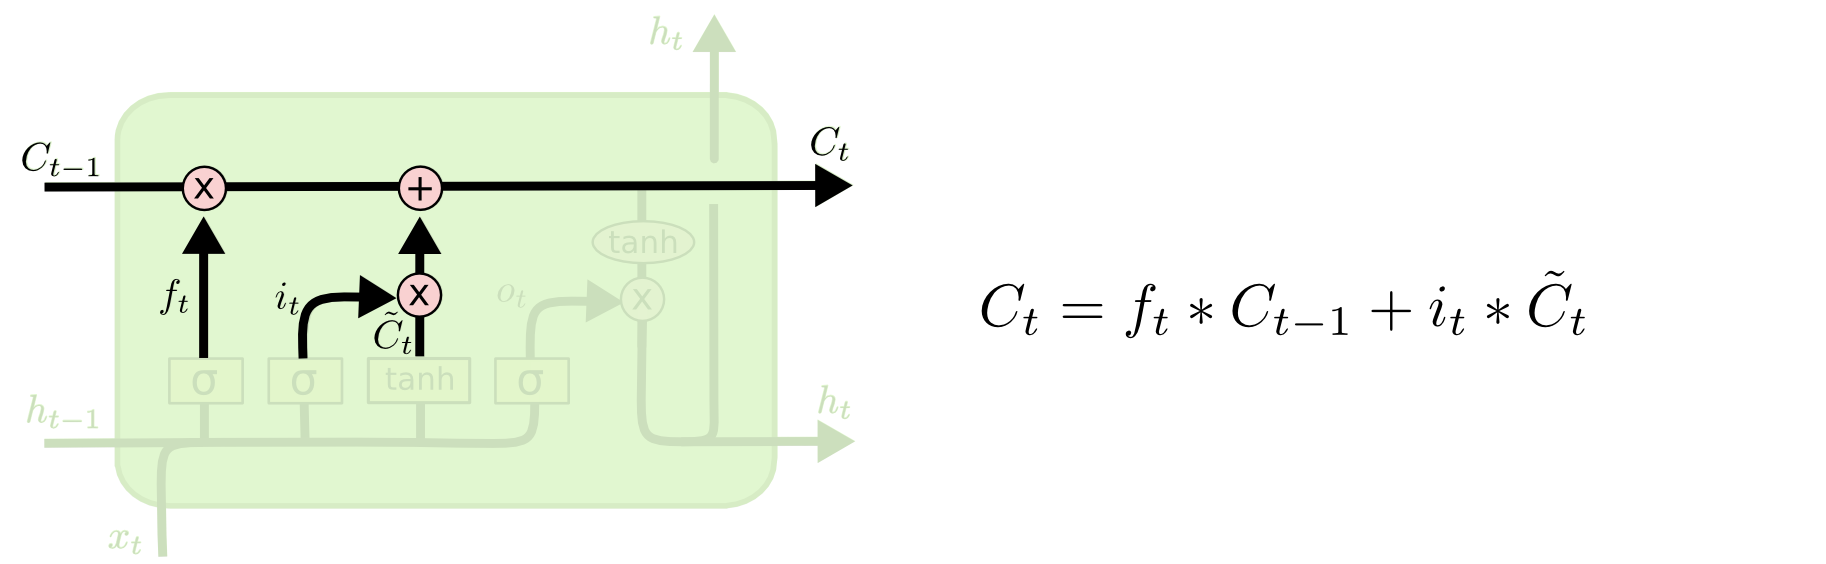

### Output

  - Based on calculated current cell state, current input and previous hidden state

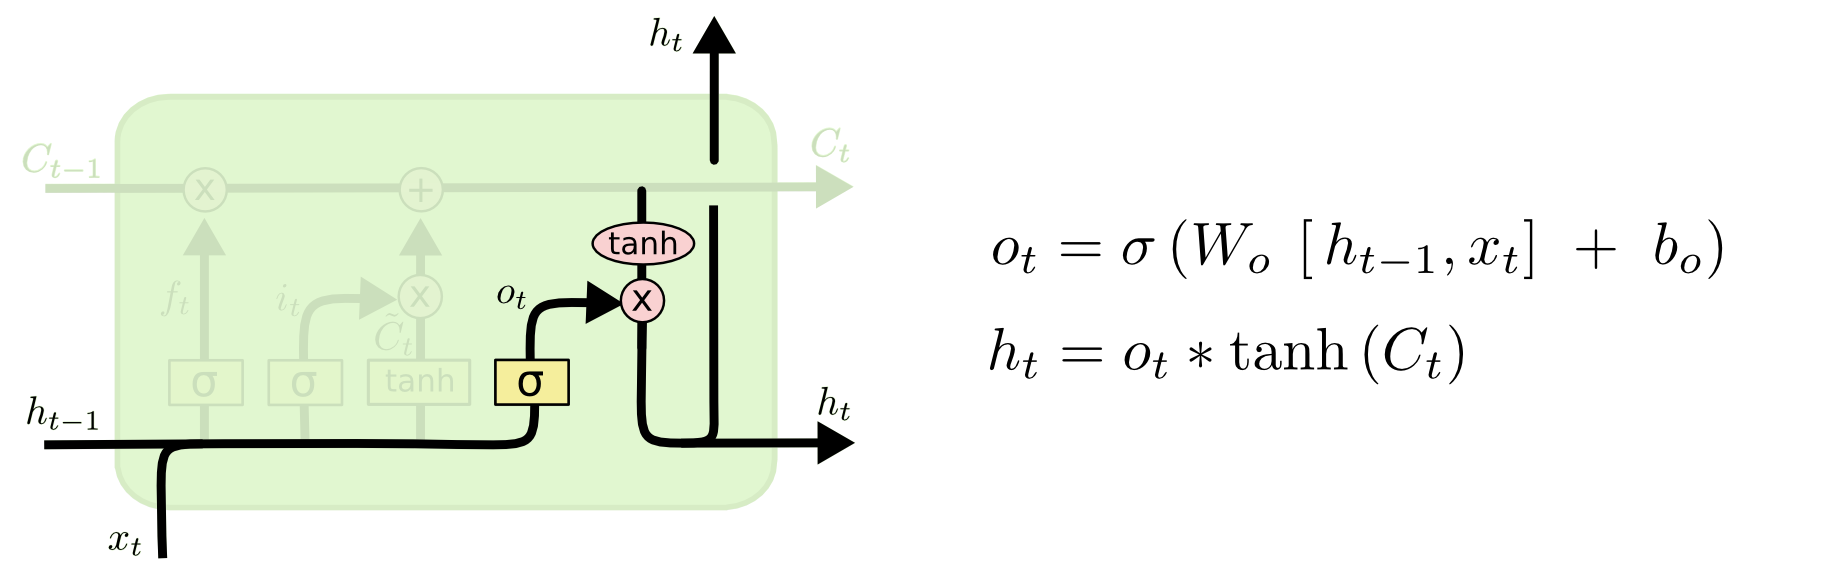

### Questions

- Write code for an LSTM cell
    - Two ways of doing, one is to define linear layers for each weight matrix multiplication in the equation. The second method is to use nn.Parameters, use the first method. 

    - If you look at the first 4 equations, something is strangely similar between them, what is it? Can you leverage it in your code as well?

    - Before that lets discuss dimensions.

In [ ]:
# Write your code here

class LSTMcell(nn.Module):
  def __init__(self,input_dim,hidden_dim):
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim

    self.input_hidden = nn.Linear(input_dim,hidden_dim*4)
    self.hidden_hidden = nn.Linear(hidden_dim,hidden_dim*4)
    #
    #

  def forward(self,hidden,input):

    conc_gates = self.input_hidden(input) + self.hidden_hidden(hidden)
    # Fill the rest


    
    

# Gated recurrent unit (GRU)

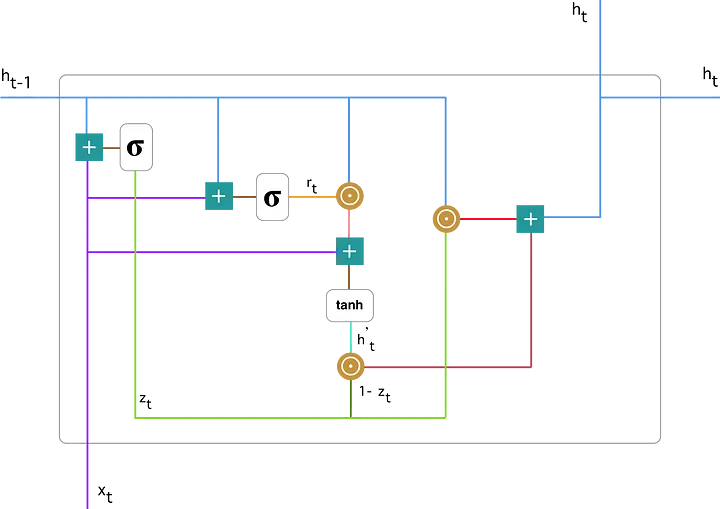

## Update gate
   - Add new information

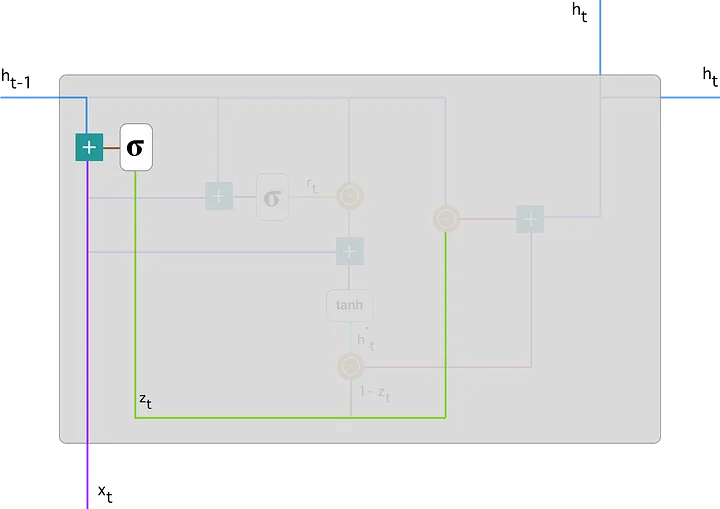

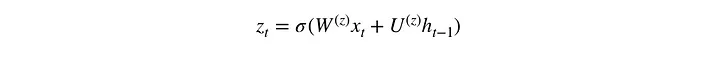

## Reset gate
  - Forget 

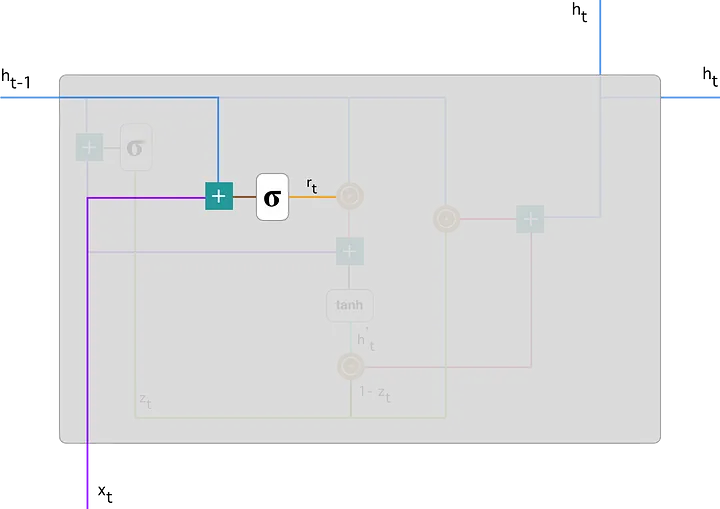

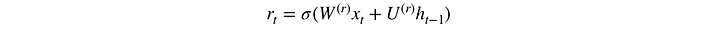

## Update current memory

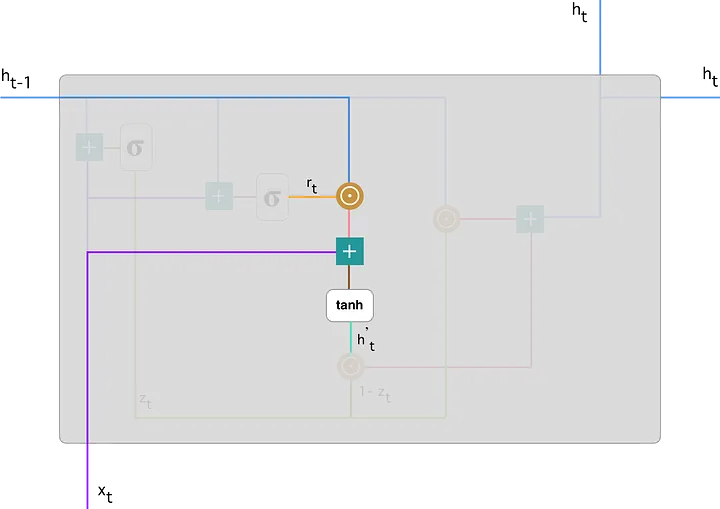

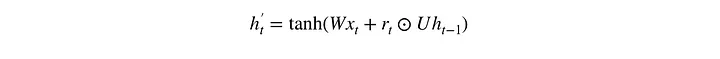

## Final output

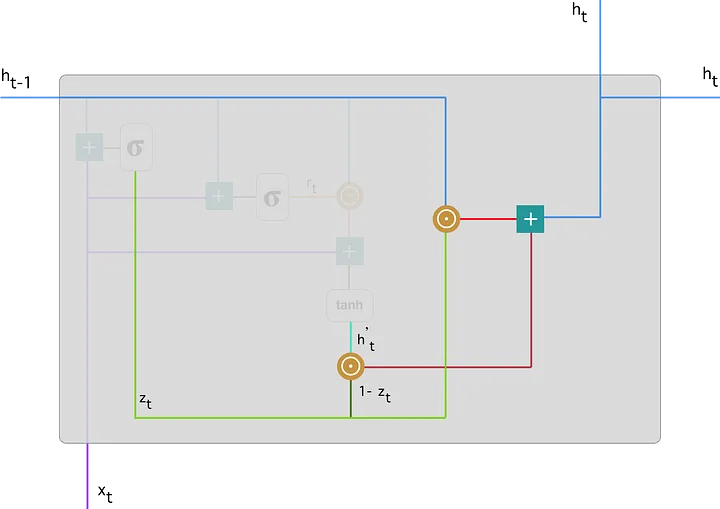

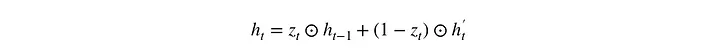

## All equations

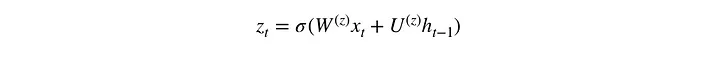

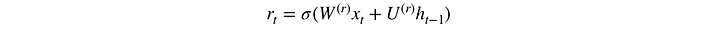

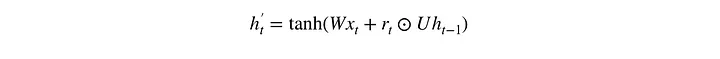

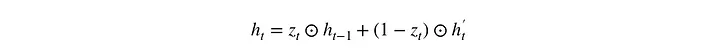

## Question
- Write code for a GRU unit cell
    - Again the first three equations look very similar

In [ ]:
# Write your code here

class GRUcell():
  def __init__(self,input_dim,hidden_dim):
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.input_hidden = nn.Linear(input_dim,3*hidden_dim)
    self.hidden_hidden = nn.Linear(hidden_dim,3*hidden_dim)

  def forward(self,hidden,input):
    conc_xt = self.input_hidden(input)
    conc_ht = self.hidden_hidden(hidden)

    # Complete the code, Chunk and then activation functions




# Attention

- How many of you have heard this phrase "Attention is All You Need" ?
- Almost every SOTA models in computer vision and NLP are some variants of "Transformer" architecture which in their core have the Attention paradigm.
    - GPT-4, vision transformers
- The very first instance of attention was proposed in 2014, but we will study the more recent version.
    - To counteract something called the "Bottleneck problem" in long sequeneces
    - Fixed context vector length


## Setting up the intuitive

- Attention in in its core is a simple mechanism of selectively attending to items out of a bunch of items. 
- We humans do it all the time
    - We pay more **attention** to classes when an exam is around the corner
    - When watching a movie we focus on the current scene being demonstrated rather than looking at **unrelevant(less important)** things around the scene.
    - While reading a boring book, we often skim past the filler content, and **focus** on the **important** parts of the script.
  

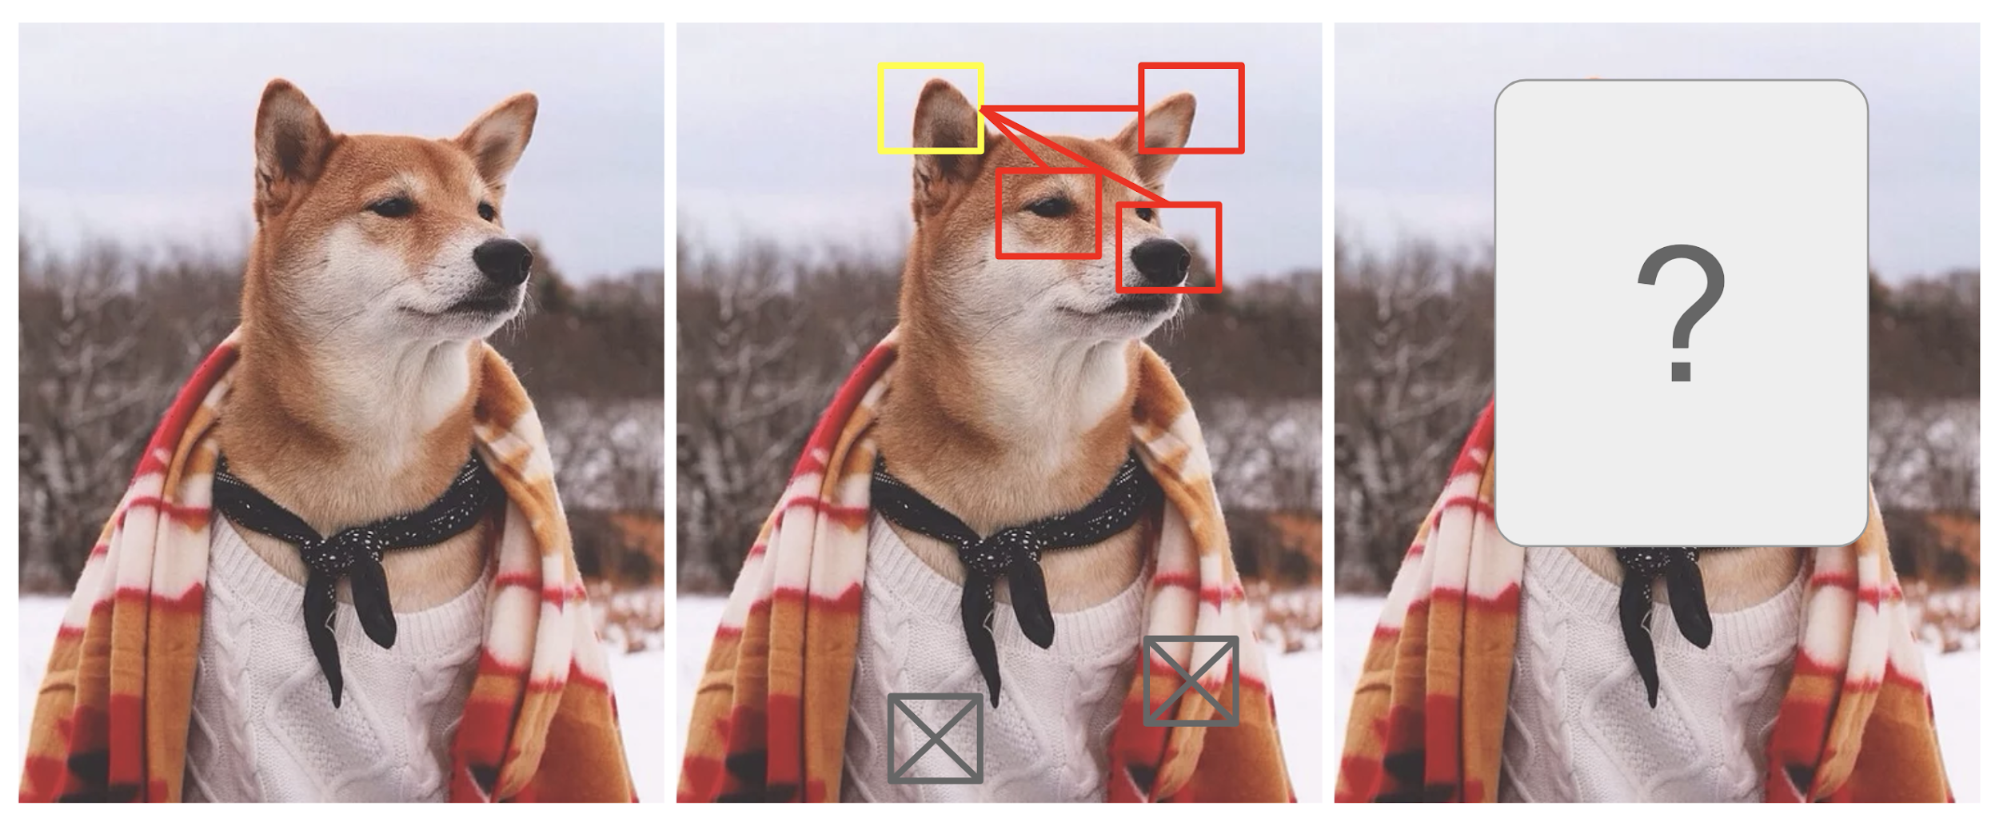

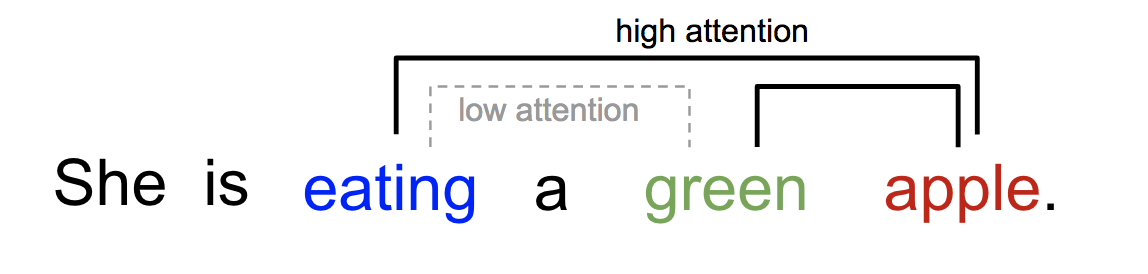

[source](https://lilianweng.github.io/posts/2018-06-24-attention/)

## Example
- Machine translation

  "I am Shiva" --> "je suis Shiva"

  For the word "suis" "am" is more important than the word "I". In other words "suis" pays more attention to "am" than to "I" and "Shiva"

### Without Attention

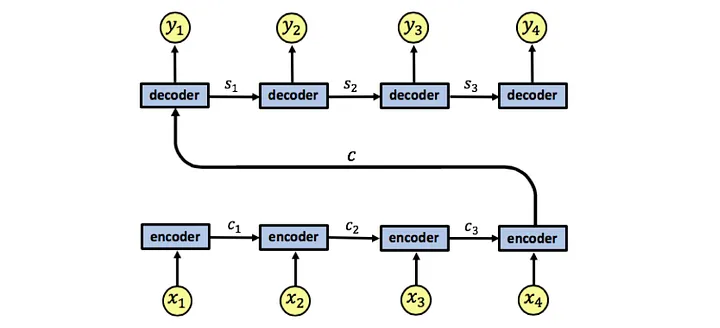

### With Attention

image.png

### Attention

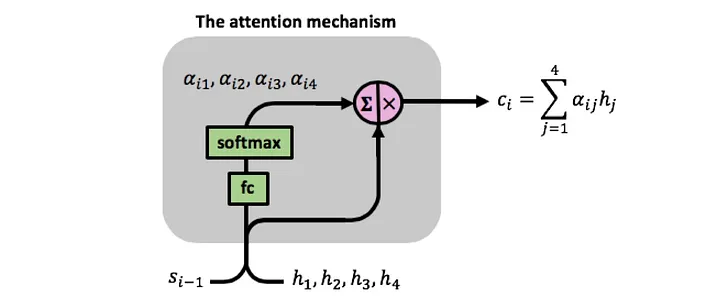

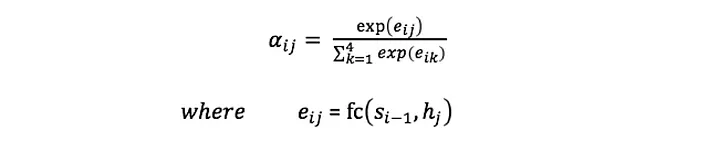

## Mathematical modelling




$\alpha_i$ can be thought as attention weights. In other words for a particular context vector $c_i$ how much does each hidden state

image.png

- Compute the hidden states from our encoder model
- Starting state for the decoder and the $h_i$'s are used to calculate the context vector for decoder-1, which in turn ouputs $s_1&

image.png

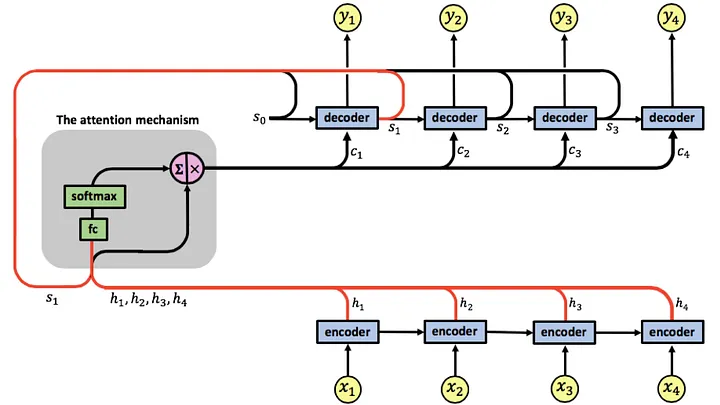

- Rinse and repeat the process, but this time the input for decoder2 is the $s_1$ and the context vector is calculated from $s_1$

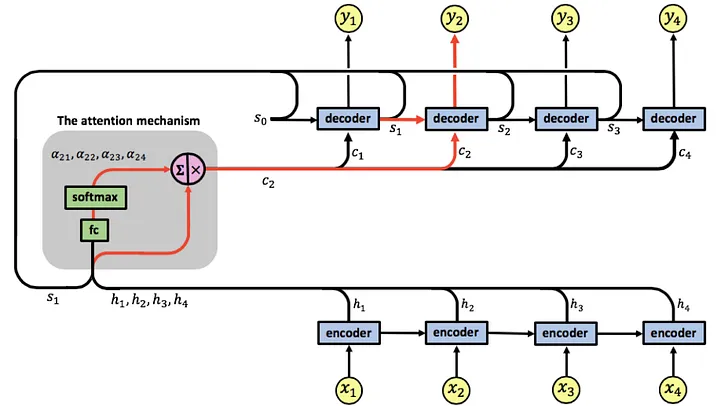

## Question

- Write pseudocode for the  attention module.Clearly specify the inputs which you think are needed. Return the attention probablities

- Write an pseudocode for the, that uses attention for machine translation. Clearly specify the inputs which you think are needed.

In [ ]:


"""
# Write your pseudocode here
Attention: 

  Inputs:
    encoder_outputs (n,hidden_dim) , where n is the number of encoders
    hidden - Current  hidden state of the decoder

  FC1 = Linear(input_dim + hidden_dim,hidden_dim)
  FC2 = Linear(hidden_dim,1)
  attention_values = []
  for hj in encoder_outputs:
    attention_valuej = FC2(FC1(cat(hj,hidden)))
    add attention_valuej to attention_values

  return softmax(attention_values)



"""



In [ ]:


"""
# Write your pseudocode here

Inputs:
  encoder_outputs (n,hidden_dim) , where n is the number of encoders
  hidden - Current  hidden state of the decoder

attention_probs = Attention(encoder_outputs,hidden)
context_vector = attention_probs*encoder_outputs
RNN(context = context_vector,hidden = hidden)

"""

